<a href="https://colab.research.google.com/github/srimoyee1212/VisualQuestionAnswering/blob/main/vqa_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install peft
!pip install accelerate
!pip install bitsandbytes

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
!pip install huggingface_hub

In [9]:
# Import necessary libraries for Google Drive access
from google.colab import drive
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer, ViltProcessor, AutoModelForPreTraining, PaliGemmaProcessor
from PIL import Image
from huggingface_hub import notebook_login

# Login to Hugging Face
notebook_login()

# Mount Google Drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import requests
from PIL import Image
import torch

# Load the model configuration, base model, and tokenizer
config = PeftConfig.from_pretrained("srimoyee12/new_paligemma_vqa_2")
base_model = AutoModelForPreTraining.from_pretrained("google/paligemma-3b-pt-224")
model = PeftModel.from_pretrained(base_model, "srimoyee12/new_paligemma_vqa_2")
tokenizer = AutoTokenizer.from_pretrained("google/paligemma-3b-pt-224")


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

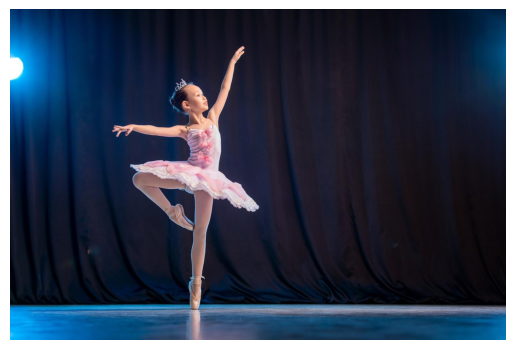

What is the color of the dress?
pink


In [18]:
from transformers import PaliGemmaProcessor
import matplotlib.pyplot as plt


# Load the VQA processor
processor = PaliGemmaProcessor.from_pretrained("google/paligemma-3b-pt-224")


# Example image and question
image_path = "/content/drive/MyDrive/ballet.jpg"  # Update this with your actual Google Drive file path
input_text = "What is the color of the dress?"
input_image = Image.open(image_path)
plt.imshow(input_image)
plt.axis('off')  # Hide the axis
plt.show()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = processor(text=input_text, images=input_image, padding="longest", do_convert_rgb=True, return_tensors="pt").to(device)
model.to(device)
inputs =inputs.to(dtype=model.dtype)


with torch.no_grad():
    output = model.generate(**inputs, max_length=496)

print(processor.decode(output[0], skip_special_tokens=True))